## Employee Attrition Prediction

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [174]:
df = pd.read_csv("employee_attrition.csv")

In [175]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [176]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [177]:
# Education Mapping
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

# Environment Satisfaction Mapping
env_satisfaction_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

# Job Involvement Mapping
job_involvement_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

# Job Satisfaction Mapping
job_satisfaction_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

# Performance Rating Mapping
performance_rating_map = {
    1: 'Low',
    2: 'Good',
    3: 'Excellent',
    4: 'Outstanding'
}

# Relationship Satisfaction Mapping
relationship_satisfaction_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

# Work Life Balance Mapping
work_life_balance_map = {
    1: 'Bad',
    2: 'Good',
    3: 'Better',
    4: 'Best'
}

# Now map all encoded columns
df['Education'] = df['Education'].map(education_map)
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].map(env_satisfaction_map)
df['JobInvolvement'] = df['JobInvolvement'].map(job_involvement_map)
df['JobSatisfaction'] = df['JobSatisfaction'].map(job_satisfaction_map)
df['PerformanceRating'] = df['PerformanceRating'].map(performance_rating_map)
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].map(relationship_satisfaction_map)
df['WorkLifeBalance'] = df['WorkLifeBalance'].map(work_life_balance_map)


In [178]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Y,Yes,11,Excellent,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,Y,No,23,Outstanding,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Y,Yes,15,Excellent,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Y,Yes,11,Excellent,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,Y,No,12,Excellent,Very High,80,1,6,3,Better,2,2,2,2


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

In [180]:
print(df.isnull().sum()[df.isnull().sum() > 0])


Series([], dtype: int64)


In [181]:
df.shape

(1470, 35)

### How many employees are there in the dataset? How many left the company?

In [182]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

- Only 237 out of 1470 employees left the company.

In [183]:
print(df['Attrition'].value_counts(normalize=True) * 100)

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


- Attrition Rate (Yes): 16.12% of employees left the company.

- Retention Rate (No): 83.88% of employees stayed.

- Most employees are retained; attrition is relatively low.

### What is the average age of employees who left vs. stayed?

In [184]:
df.groupby('Attrition')['Age'].mean()

Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64

- Employees who left the company had an average age of 33.6 years.

- Employees who stayed had an average age of 37.6 years.

- Younger employees are more likely to leave the company.

### What is the attrition rate across departments?

In [185]:
dept_attrition = df.groupby(['Department', 'Attrition']).size().unstack()

In [186]:
dept_attrition

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


- Research & Development: Majority stayed (828), but 133 left — moderate attrition.

- Sales: 92 employees left out of 446 — relatively higher attrition rate.

- Human Resources: Smallest group, but 12 out of 63 left — highest attrition rate proportionally.

In [187]:
dept_attrition['Attrition Rate (%)'] = (dept_attrition['Yes'] / dept_attrition.sum(axis=1)) * 100
print(dept_attrition[['Attrition Rate (%)']].round(2))

Attrition               Attrition Rate (%)
Department                                
Human Resources                      19.05
Research & Development               13.84
Sales                                20.63


- Sales and HR have higher attrition rates (20.63% and 19.05%) compared to R&D (13.84%), indicating greater turnover in those departments.

### Is there any correlation between distance from home and attrition?

In [188]:
# Encode Attrition (Yes=1, No=0)
df['Attrition_encoded'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# 1. Correlation between DistanceFromHome and Attrition
corr1, _ = pearsonr(df['DistanceFromHome'], df['Attrition_encoded'])
print(f"Correlation (DistanceFromHome vs Attrition): {corr1:.2f}")


Correlation (DistanceFromHome vs Attrition): 0.08


- There is a very weak positive correlation (0.08) between Distance from Home and Attrition, indicating almost no meaningful relationship.

### What is the relationship between overtime and attrition?

In [189]:
# Crosstab to check counts
overtime_attrition = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100
print(" % of Attrition within each Overtime category:\n")
print(overtime_attrition.round(2))


 % of Attrition within each Overtime category:

Attrition     No    Yes
OverTime               
No         89.56  10.44
Yes        69.47  30.53


- Employees who work overtime have a significantly higher attrition rate (30.53%) compared to those who don’t (10.44%).

### How does monthly income impact attrition?

In [190]:
# Compare mean income by Attrition status
income_comparison = df.groupby('Attrition')['MonthlyIncome'].mean()
print("\n Average Monthly Income by Attrition status:\n")
print(income_comparison.round(2))



 Average Monthly Income by Attrition status:

Attrition
No     6832.74
Yes    4787.09
Name: MonthlyIncome, dtype: float64


- Employees who left the company (Attrition = Yes) had a lower average monthly income (4787.09) compared to those who stayed (6832.74).

### Bar chart: Count of employees by Attrition.

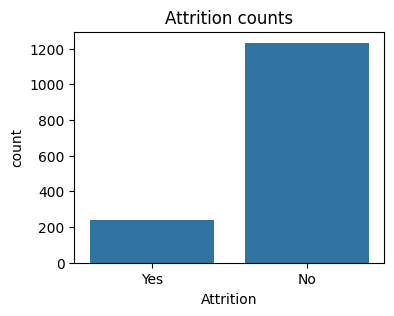

In [191]:
plt.figure(figsize=(4,3))
sns.countplot(x= 'Attrition'  , data =df)
plt.title('Attrition counts')
plt.show()

### Boxplot: MonthlyIncome vs Attrition.

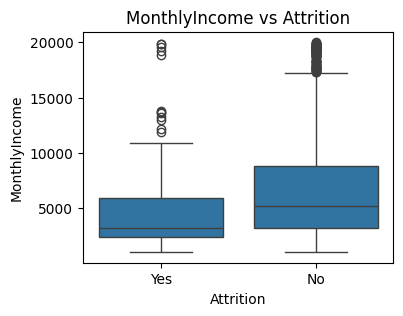

In [192]:
plt.figure(figsize=(4,3))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('MonthlyIncome vs Attrition')
plt.show()

### Histogram: Age distribution by Attrition.

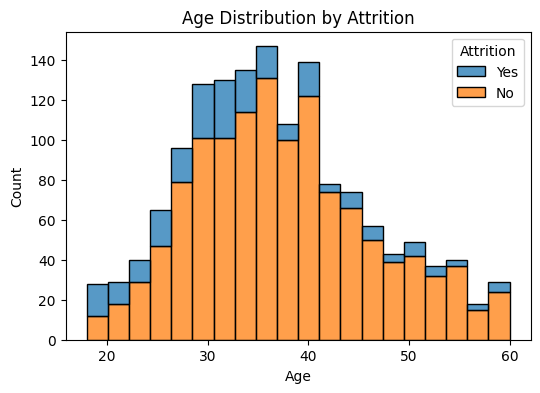

In [193]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', hue='Attrition', kde=False, multiple='stack', bins=20)
plt.title('Age Distribution by Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


- Most attrition happens between ages 25–37.

- Employees above 40 rarely leave.

- Younger employees are more likely to quit.

### Stacked bar chart: Department vs Attrition.

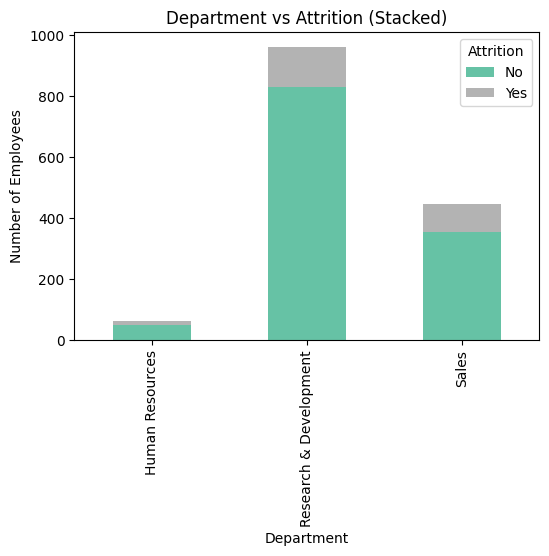

In [194]:
pd.crosstab(df['Department'], df['Attrition']).plot(kind='bar', stacked=True, figsize=(6,4), colormap='Set2')
plt.title('Department vs Attrition (Stacked)')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()

### Countplot: JobSatisfaction by Attrition.

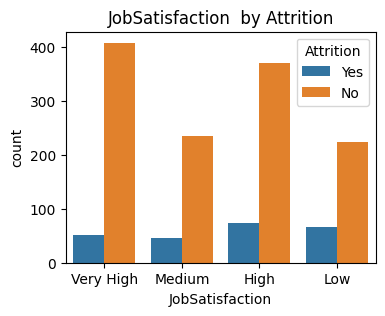

In [195]:
plt.figure(figsize=(4,3))
sns.countplot(x= 'JobSatisfaction', hue = 'Attrition'  , data =df)
plt.title('JobSatisfaction  by Attrition')
plt.show()

### Heatmap: Correlation between numerical variables.

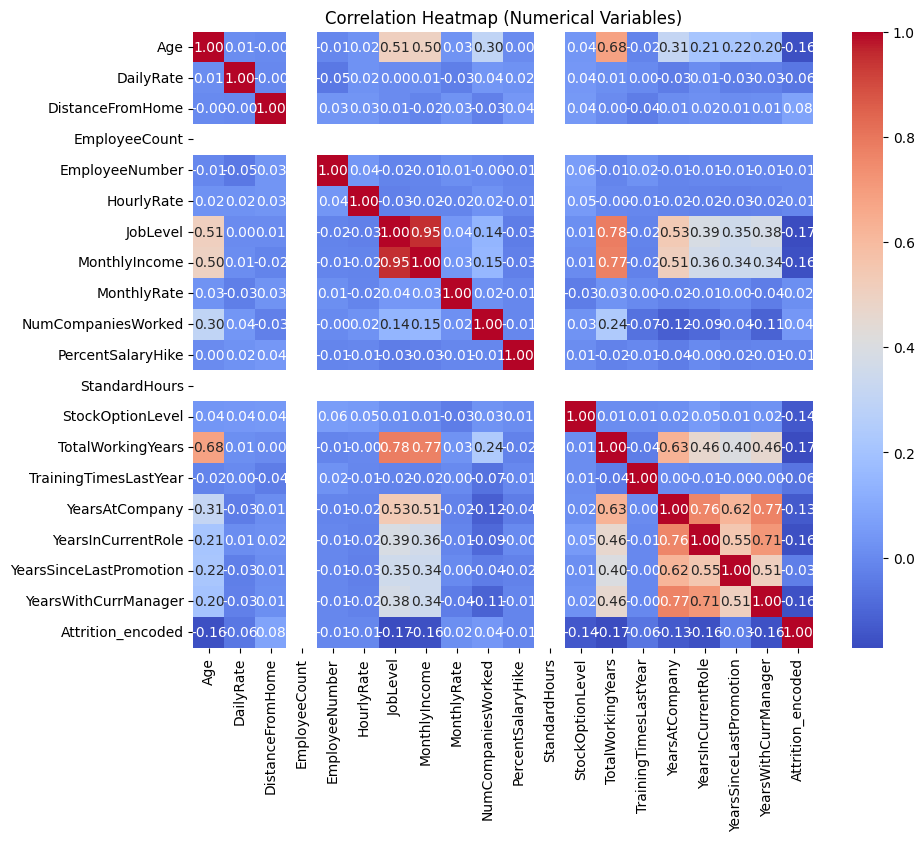

In [197]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numerical Variables)')
plt.show()

In [198]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_encoded
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Y,Yes,11,Excellent,Low,80,0,8,0,Bad,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,Y,No,23,Outstanding,Very High,80,1,10,3,Better,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Y,Yes,15,Excellent,Medium,80,0,7,3,Better,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Y,Yes,11,Excellent,High,80,0,8,3,Better,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,Y,No,12,Excellent,Very High,80,1,6,3,Better,2,2,2,2,0


In [199]:
df_model = df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber', 'Attrition'], axis=1)

In [200]:
df_model.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_encoded
0,41,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Yes,11,Excellent,Low,0,8,0,Bad,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,No,23,Outstanding,Very High,1,10,3,Better,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Yes,15,Excellent,Medium,0,7,3,Better,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Yes,11,Excellent,High,0,8,3,Better,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,No,12,Excellent,Very High,1,6,3,Better,2,2,2,2,0


In [201]:
# Binary encoding with LabelEncoder
label_cols = ['Gender', 'OverTime']
le = LabelEncoder()
for col in label_cols:
    df_model[col] = le.fit_transform(df_model[col])

# OneHotEncoding for multiclass categories
df_model = pd.get_dummies(df_model, columns=[
    'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus','Education','WorkLifeBalance','RelationshipSatisfaction','PerformanceRating','JobSatisfaction','JobInvolvement','EnvironmentSatisfaction'
], drop_first=True)


In [202]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features and target
X = df_model.drop('Attrition_encoded', axis=1)
y = df_model['Attrition_encoded']

# Apply SelectKBest
selector = SelectKBest(score_func=f_classif, k=15)
X_new = selector.fit_transform(X, y)

# Get names of selected features
selected_features = X.columns[selector.get_support()]
print("Top 15 Selected Features (SelectKBest):\n", selected_features)


Top 15 Selected Features (SelectKBest):
 Index(['Age', 'JobLevel', 'MonthlyIncome', 'OverTime', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'JobRole_Laboratory Technician', 'JobRole_Sales Representative',
       'MaritalStatus_Single', 'JobInvolvement_Low',
       'EnvironmentSatisfaction_Low'],
      dtype='object')


In [203]:
# Start with numeric/label encoded features
final_selected_features = [
    'Age', 'JobLevel', 'MonthlyIncome', 'OverTime', 'StockOptionLevel',
    'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'
]

# Include all categories from OneHotEncoded groups
onehot_groups = ['JobRole_', 'MaritalStatus_', 'JobInvolvement_',
                 'EnvironmentSatisfaction_', 'BusinessTravel_']

# Add all matching columns from X
for prefix in onehot_groups:
    group_features = [col for col in df_model.columns if col.startswith(prefix)]
    final_selected_features.extend(group_features)


In [204]:
X_selected = df_model[final_selected_features]
y = df_model['Attrition_encoded']

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [206]:
log_model = LogisticRegression(solver='liblinear',max_iter=5000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [207]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [208]:
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [211]:
# Define Evaluation Function
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n=== {model_name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Call for each model
evaluate_model(y_test, y_pred_log, "Logistic Regression")


=== Logistic Regression ===
Accuracy: 0.8741
Confusion Matrix:
 [[243   4]
 [ 33  14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       247
           1       0.78      0.30      0.43        47

    accuracy                           0.87       294
   macro avg       0.83      0.64      0.68       294
weighted avg       0.86      0.87      0.85       294



In [212]:
evaluate_model(y_test, y_pred_rf, "Random Forest")


=== Random Forest ===
Accuracy: 0.8367
Confusion Matrix:
 [[241   6]
 [ 42   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.45      0.11      0.17        47

    accuracy                           0.84       294
   macro avg       0.65      0.54      0.54       294
weighted avg       0.79      0.84      0.79       294



In [213]:
evaluate_model(y_test, y_pred, "Decision Tree")


=== Decision Tree ===
Accuracy: 0.7925
Confusion Matrix:
 [[218  29]
 [ 32  15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       247
           1       0.34      0.32      0.33        47

    accuracy                           0.79       294
   macro avg       0.61      0.60      0.60       294
weighted avg       0.79      0.79      0.79       294



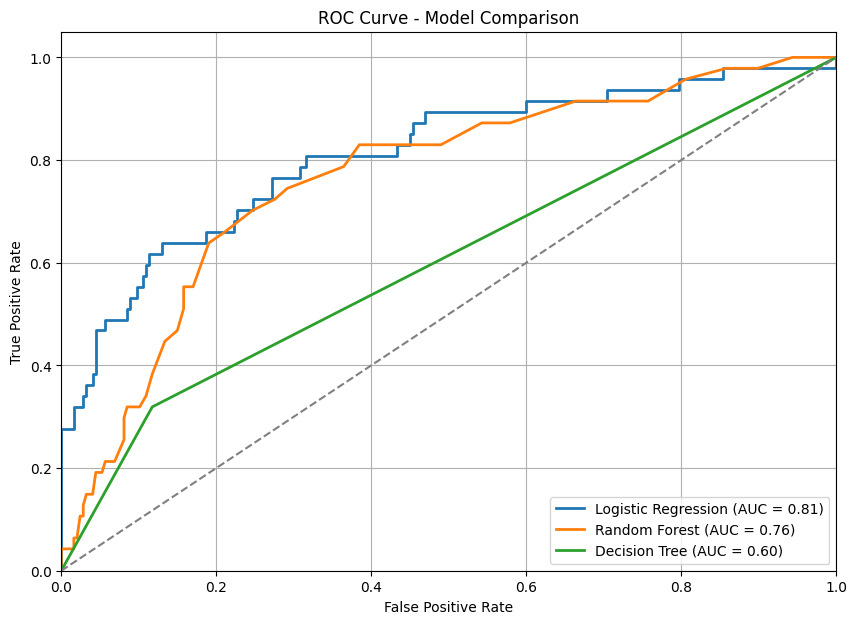

In [216]:
# Logistic Regression
y_scores_log = log_model.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_scores_log)
roc_auc_log = auc(fpr_log, tpr_log)

# Random Forest
y_scores_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Decision Tree
y_scores_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_scores_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plotting all ROC curves together
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})', lw=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', lw=2)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})', lw=2)

# Diagonal line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
